# <u>Convolutional Neural Network</u>

Le Convolutional Neural Network, aussi appelé CNN ou Convnet, est un type de réseau de neurones qui permet un traitement convolutif d'images, c'est à dire des régions d'images. Le but est dé prétraiter des petites quantités d'informations. Les réseaux neuronaux convolutifs sont populaires pour leur capacité à traiter efficacement la reconnaissance d'image et de vidéo.
<br>
<img src="https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg"></img>
<small><small>Source : https://miro.medium.com/</small></small>
<br>

Dans le cadre de Tensorflow, on peut créer des modèles CNN grâce à la classe `Sequential()` mais surtout en y ajoutant des `Conv2D()` qui vont nous permettre de gérer un certain nombre de filtre par image ainsi que la taille de nos noyaux. De plus, nous y ajouterons également des couches de `MaxPool2D()` qui réduisent les données d'image sans en modifier la profondeur de sortie. Pour notre couche de sortie, nous suiverons le même principe que le perceptron multi-couches en utilisant une couche `Dense()` pour avoir 10 résultats en sortie en utilisant la fonction d'activation `softmax`.

Pour suivre l'example de nos modèles MLP et suite à des expérimentations nous utiliserons également du Dropout pour éviter un overfit trop important.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)         

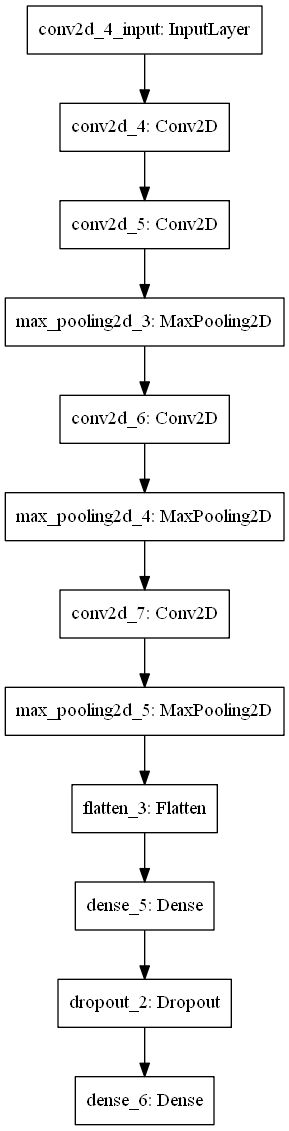

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.utils import plot_model

model = Sequential()

model.add(Conv2D(64, (3,3), padding="same", activation=relu, input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), padding="same", activation=relu))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), padding="same", activation=relu))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), padding="same", activation=relu))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(10, activation=softmax))
model.compile(optimizer="adam", loss=sparse_categorical_crossentropy,metrics=[sparse_categorical_accuracy])
model.build()
model.summary()
plot_model(model,to_file="./img/convnet.png")

En appliquant ce modèle sur CIFAR-10 voilà ce que nous obtenons :

In [18]:
import sys
sys.path.insert(1, '..') # allow import from parent folder
from src.cifar10 import Cifar10

cifar10 = Cifar10(dim=3)

cifar10.helper.fit(
    model,
    cifar10.x_train,
    cifar10.y_train,
    1024,
    100,
    validation_data=(cifar10.x_test, cifar10.y_test),
    process_name="convnet"
)

Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\responses\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\responses\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkpoints\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\tensorboard\fit\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\tensorboard\fit\convnet_4_20200203-122949\
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
49152/50000 [============================>.] - ETA: 2s - loss: 2.0130 - sparse_categorical_accuracy: 0.2569
Epoch 00001: saving model to C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\

Epoch 19/100
49152/50000 [============================>.] - ETA: 2s - loss: 0.8004 - sparse_categorical_accuracy: 0.7194
Epoch 00019: saving model to C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkpoints\convnet_4.ckpt
50000/50000 [==============================] - 136s 3ms/sample - loss: 0.7996 - sparse_categorical_accuracy: 0.7200 - val_loss: 0.8032 - val_sparse_categorical_accuracy: 0.7181
Epoch 20/100
49152/50000 [============================>.] - ETA: 2s - loss: 0.7837 - sparse_categorical_accuracy: 0.7246
Epoch 00020: saving model to C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkpoints\convnet_4.ckpt
50000/50000 [==============================] - 135s 3ms/sample - loss: 0.7841 - sparse_categorical_accuracy: 0.7244 - val_loss: 0.8180 - val_sparse_categorical_accuracy: 0.7203
Epoch 21/100
49152/50000 [============================>.] - ETA: 2s - loss: 0.7706 - sparse_categorical_accuracy: 0.7288
Epoch 00021: saving model t

49152/50000 [============================>.] - ETA: 2s - loss: 0.4305 - sparse_categorical_accuracy: 0.8444
Epoch 00057: saving model to C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkpoints\convnet_4.ckpt
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.4318 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.7143 - val_sparse_categorical_accuracy: 0.7626
Epoch 58/100
49152/50000 [============================>.] - ETA: 2s - loss: 0.4170 - sparse_categorical_accuracy: 0.8499
Epoch 00058: saving model to C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkpoints\convnet_4.ckpt
50000/50000 [==============================] - 134s 3ms/sample - loss: 0.4184 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.7381 - val_sparse_categorical_accuracy: 0.7648
Epoch 59/100
49152/50000 [============================>.] - ETA: 2s - loss: 0.4083 - sparse_categorical_accuracy: 0.8526
Epoch 00059: saving model to C:\Users\th

KeyError: 'val_loss'

Nous observons alors que nous avons une précision supérieure que lorsque nous faisions un MLP classique. Cependant le score est sûrement diminué à cause de l'underfitting global de ce modèle.
Le temps d'exécution est cependant bien plus long avec un convnet qu'avec un MLP.

Pour corriger le problème de temps d'exécution, nous avons également ajouté un système d'arrêt anticipé avec le callback `EarlyStopping` de keras.

In [ ]:
# Ajouté dans notre fonction `fit()` dans helper.py
earlystop_callback = tf.keras.EarlyStopping(
    monitor="val_sparse_categorical_accuracy", min_delta=0.0001,
    patience=1
)